In [2]:
# Importing OS and Pathlib, so that we can work with files in our directories/PC
import os
import pathlib

# Some basic libraries that help us create dataframes and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use("fivethirtyeight")
%matplotlib inline

# Deep Learning Libraries like Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

# Shows the Tensorflow and Keras Version
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

# To Suppress any Un-necessary warnings
import warnings
warnings.filterwarnings('ignore')

Tensorflow Version: 2.12.0
Keras Version: 2.12.0


In [3]:
data_dir_train = pathlib.Path('E:/chest_xray_dataset/train')
data_dir_test = pathlib.Path('E:/chest_xray_dataset/test')
data_dir_val = pathlib.Path('E:/chest_xray_dataset/pred')

In [4]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 7315
Number of Images in Test: 620
Number of Images in Validation: 9


In [5]:
# Here, we are defining some variables which will be commonly used in the further codes
height = 150
width = 150
batch_size = 16
seed = 42 # For reproducibility 

In [6]:
# Next! In this step, we are going to use the method "image_dataset_from_directory()" to construct a dataset!

# First we ask Keras to create a "training" dataset with 0.2 as validation split.

train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='training',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 5852 files for training.


In [7]:
# Second we ask Keras to create a "validation" dataset with 0.2 as validation split.

val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='validation',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 1463 files for validation.


In [8]:
# Finally we are storing all the available class names from the dataset. (NORMAL and PNEUMONIA)

# This also ensures, we have created the dataset successfully!

class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

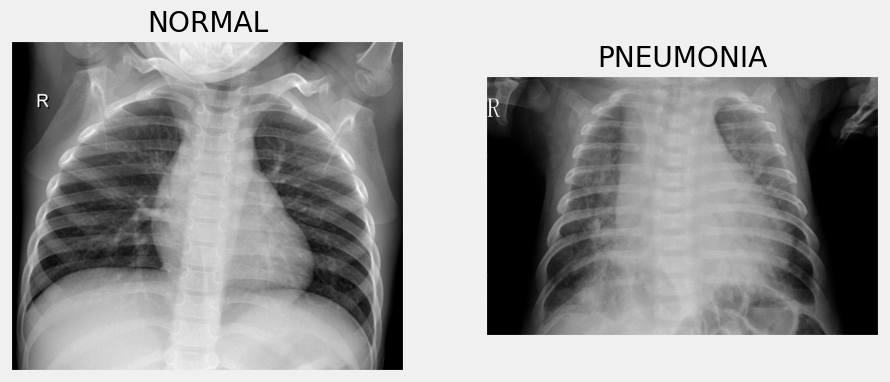

In [9]:
# Defining the Canvas size
plt.figure(figsize=[10,8])

# Next we are just picking one image from the unique categories and displaying them:
for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()

In [10]:
# Here we start building our model in Keras:

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])

In [11]:
# Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# Here we will use visualkeras to visualize the CNN Model that we created

# First step: Install Visual Keras
!pip install visualkeras

     ---------------------------------------- 43.2/43.2 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


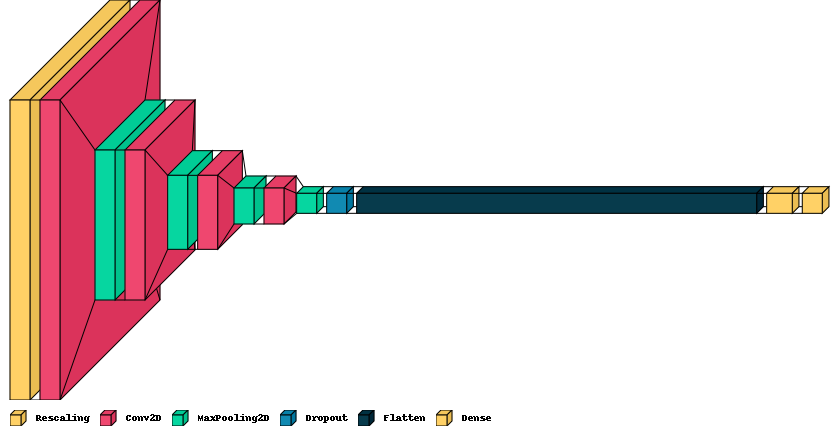

In [13]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [14]:
# Finally we are going to train our model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
366/366 [==============================] - 264s 704ms/step - loss: 0.2817 - accuracy: 0.8795 - val_loss: 0.1516 - val_accuracy: 0.9467
Epoch 2/20
366/366 [==============================] - 232s 625ms/step - loss: 0.1497 - accuracy: 0.9431 - val_loss: 0.1704 - val_accuracy: 0.9310
Epoch 3/20
366/366 [==============================] - 228s 618ms/step - loss: 0.1185 - accuracy: 0.9551 - val_loss: 0.1373 - val_accuracy: 0.9494
Epoch 4/20
366/366 [==============================] - 227s 617ms/step - loss: 0.1109 - accuracy: 0.9583 - val_loss: 0.0983 - val_accuracy: 0.9617
Epoch 5/20
366/366 [==============================] - 241s 653ms/step - loss: 0.0861 - accuracy: 0.9674 - val_loss: 0.1796 - val_accuracy: 0.9357
Epoch 6/20
366/366 [==============================] - 232s 630ms/step - loss: 0.0758 - accuracy: 0.9720 - val_loss: 0.1564 - val_accuracy: 0.9494
Epoch 7/20
366/366 [==============================] - 228s 618ms/step - loss: 0.0697 - accuracy: 0.9745 - val_loss: 0.1256 -

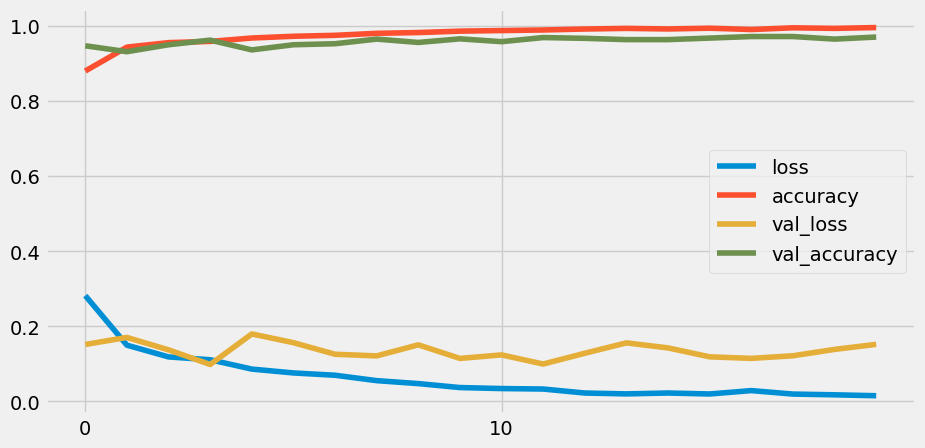

In [15]:
# Next we are going to plot a graph to check the loss and accuracy as the model trained for 20 epochs for both train and validation.
pd.DataFrame(history.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

In [16]:
# To evaluate our model, we are going to make use of the "test" dataset
test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_test,
seed=seed,
image_size=(height,width),
batch_size=batch_size)

Found 620 files belonging to 2 classes.


In [17]:
model.evaluate(test_ds, batch_size=batch_size)

39/39 [==============================] - 9s 181ms/step - loss: 0.1322 - accuracy: 0.9742


[0.13221216201782227, 0.9741935729980469]

In [18]:
# The Next step is to save the model. This is our trained model. We saved it so that we do not need to train it again and again.

# I am saving this in the .h5 format.

model.save("./xray_model.h5")

1/1 [==============================] - 0s 292ms/step


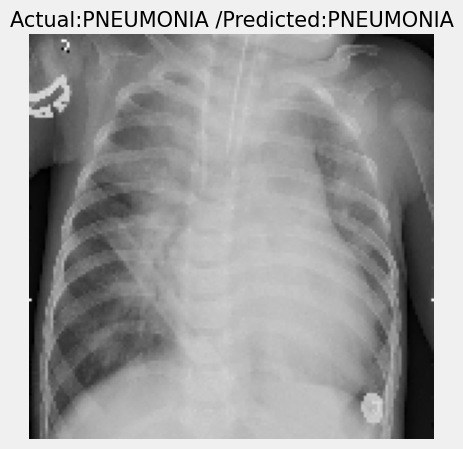

In [19]:
# Loading the .h5 model that we had saved in the previous step:
my_xray_cnnmodel = keras.models.load_model("./xray_model.h5")

# Defining an image path from the "pred" folder:
image_path = 'E:/chest_xray_dataset/pred/PNEUMONIA/PNEUMONIA_2.jpeg'

# Preprocessing the image to 150x150x3 size and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'PNEUMONIA']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = classes[np.argmax(predictions, axis=1)[0]]

# Finally we are displaying the predicted outcome:
plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()